# 1. Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
# Normalize column names to snake_case
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True)
      .str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)
      .str.strip('_')
      .str.lower()
)
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
spec = pd.DataFrame(df.dtypes)
spec = spec.rename(columns={0: "dtype"})
spec["count"]=df.count()
spec["uniq_count"]=df.nunique()
spec["na_count"]=df.isnull().sum()
spec = spec.sort_values(by="dtype")
spec

,dtype,count,uniq_count,na_count
year,int64,11914,28,0
highway_mpg,int64,11914,59,0
city_mpg,int64,11914,69,0
popularity,int64,11914,48,0
msrp,int64,11914,6049,0
engine_hp,float64,11845,356,69
engine_cylinders,float64,11884,9,30
number_of_doors,float64,11908,3,6
make,object,11914,48,0
model,object,11914,915,0


# 2. Descriptive Analysis

## 2.1 Categorical Columns

In [3]:
cat_spec = df.describe(include=['object']).T
cat_spec

,count,unique,top,freq
make,11914,48,Chevrolet,1123
model,11914,915,Silverado 1500,156
engine_fuel_type,11911,10,regular unleaded,7172
transmission_type,11914,5,AUTOMATIC,8266
driven_wheels,11914,4,front wheel drive,4787
market_category,8172,71,Crossover,1110
vehicle_size,11914,3,Compact,4764
vehicle_style,11914,16,Sedan,3048


### Top 10 Values

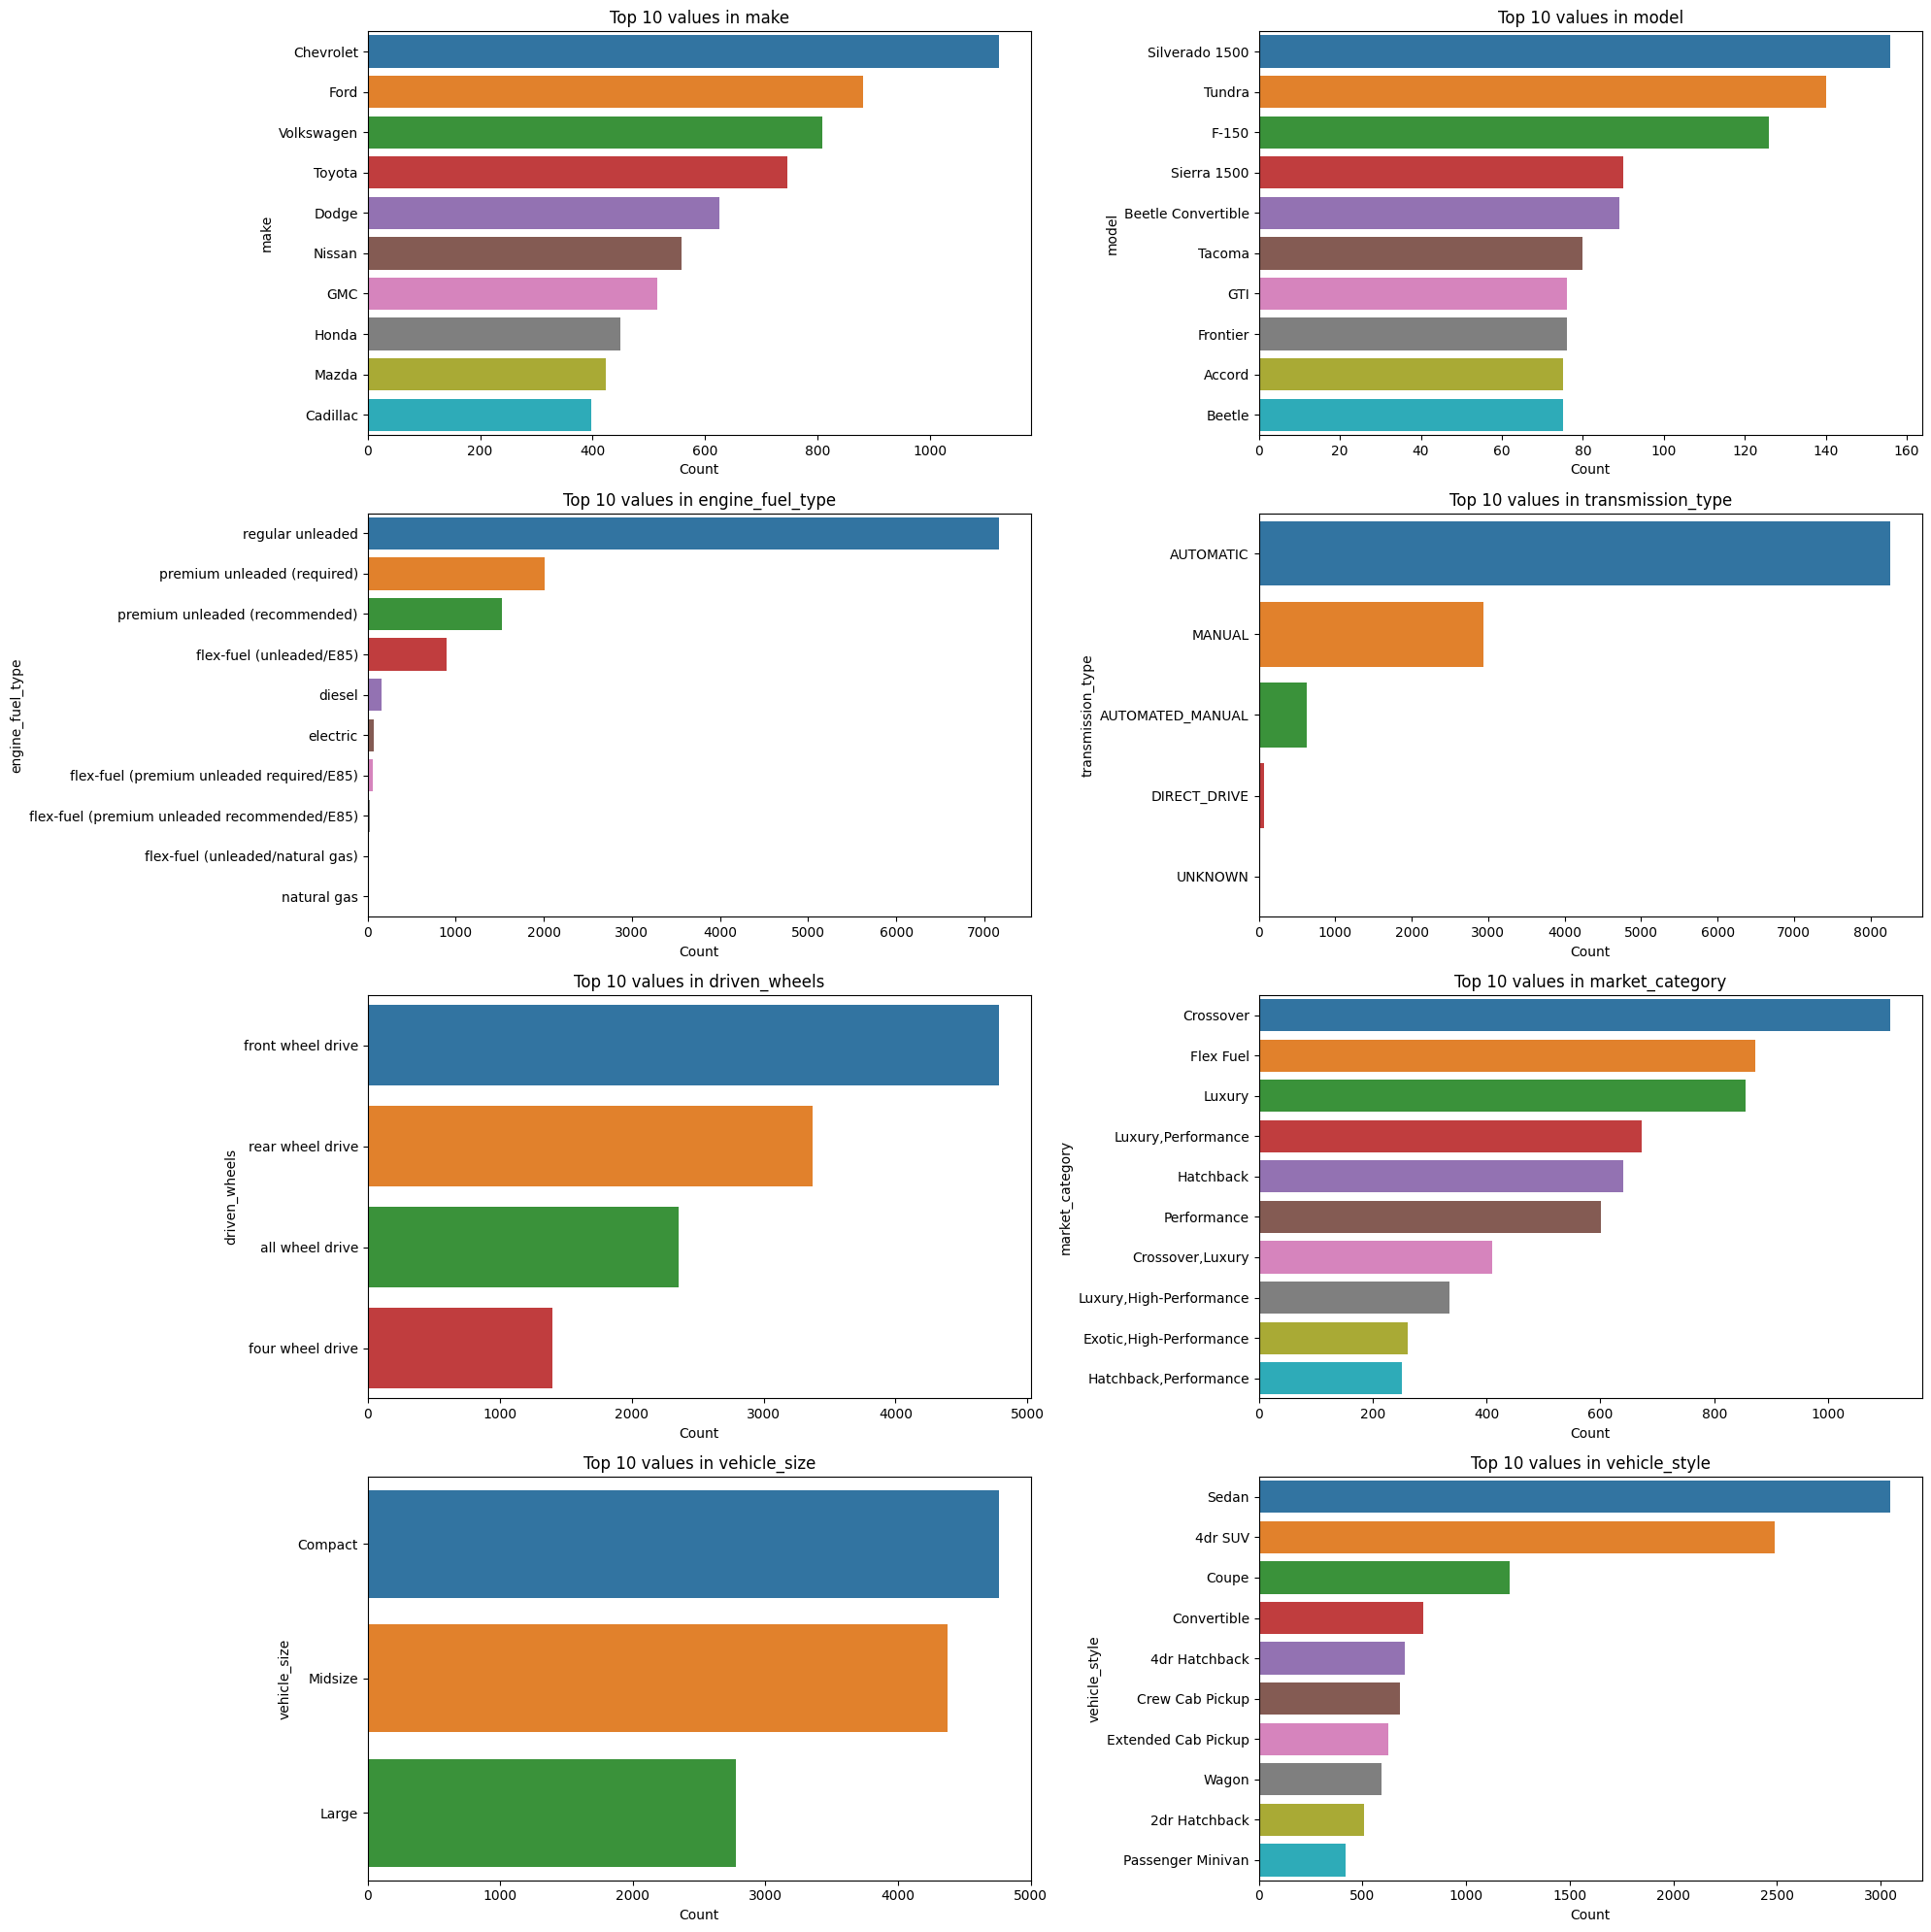

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_columns[:8]):
    top_counts = df[col].value_counts().head(10)
    palette = sns.color_palette("tab10", n_colors=len(top_counts))
    sns.barplot(
        x=top_counts.values,
        y=top_counts.index,
        orient='h',
        ax=axes[i],
        hue=top_counts.index,
        palette=palette
    )
    axes[i].set_title(f'Top 10 values in {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide unused axes
for j in range(len(categorical_columns), 8):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## 2.2 Numerical Columns

In [289]:
df.describe(include=['number']).T


,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


### Histograms

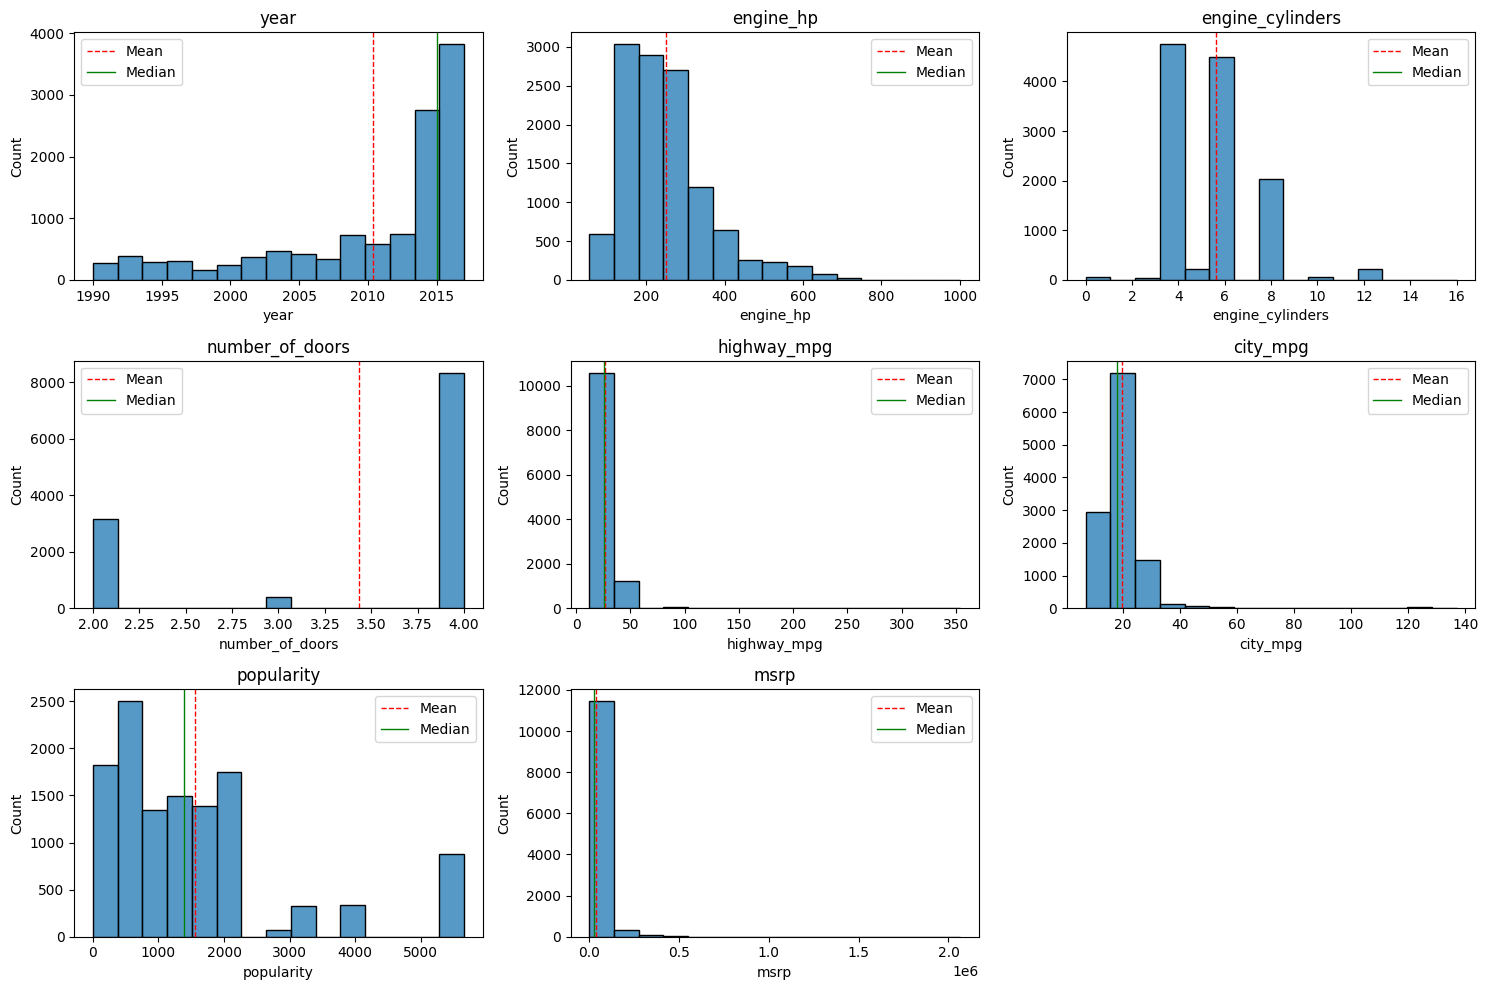

In [6]:
import numpy as np

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=15)
    mean = np.mean(df[col])
    median = np.median(df[col])
    plt.axvline(mean, color='red', linestyle='--', linewidth=1, label='Mean')
    plt.axvline(median, color='green', linestyle='-', linewidth=1, label='Median')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

### Boxplots

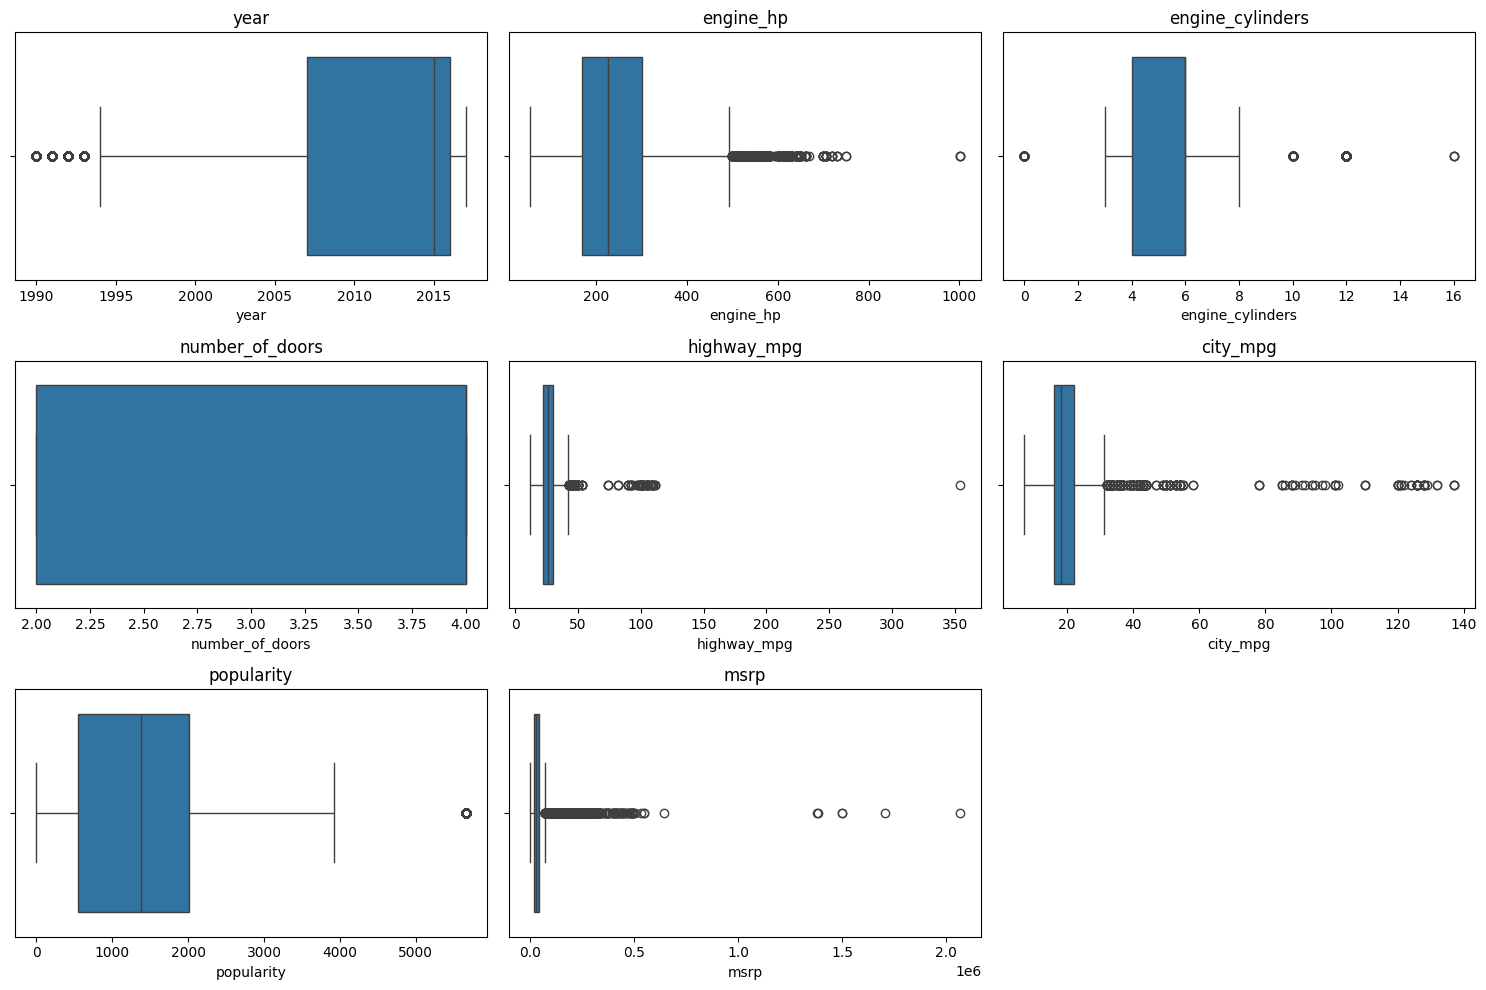

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Remove Outliers

In [8]:
# Removing outliers from numerical columns based on the IQR method
df_wo_outliers = pd.DataFrame()
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_wo_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# 3. Correlation Analysis
